In [61]:
#importing module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
from pathlib import Path

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [63]:
url = 'https://raw.githubusercontent.com/ramkguru97/Group_6_6162/main/FAO.csv'
fooddata = pd.read_csv(url, encoding=('ISO-8859-1'), 
                  low_memory = False)
fooddatadfn = fooddata[['Area Code','Area','Item Code','Item','Element','Unit','Y2007','Y2008','Y2009','Y2010','Y2011'
                        ,'Y2012','Y2013']]
fooddatadfn.head(3)

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,455.0,490.0,415.0,442.0,476.0,425,422
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,263.0,230.0,379.0,315.0,203.0,367,360


In [69]:
# world population
url2 = 'https://raw.githubusercontent.com/ramkguru97/Group_6_6162/main/WorldPopulation.csv'
worldpopdata = pd.read_csv(url2, header=[0],encoding=('ISO-8859-1'), 
                  low_memory = False)
worldpopdfn = worldpopdata[['ï»¿Country Name','Country Code','2007','2008','2009','2010','2011','2012','2013']]
worldpopdfn.rename(columns = {'ï»¿Country Name': 'Area', '2007': 'POP2007','2008':'POP2008','2009':'POP2009','2010':'POP2010',
                               '2011':'POP2011','2012':'POP2012','2013':'POP2013'}, inplace = True)
#worldpopdfn = worldpopdata[['Country Code','Area','Y2007','Y2008','Y2009','Y2010','Y2011','Y2012','Y2013']]
worldpopdfn.head(3)

C:\Users\RAMESH\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Area,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,Aruba,ABW,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0
1,Africa Eastern and Southern,AFE,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0
2,Afghanistan,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0


In [71]:
# display two datasets : fooddatadfn, worldpopdfn
display(fooddatadfn,worldpopdfn)

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,455.0,490.0,415.0,442.0,476.0,425,422
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,263.0,230.0,379.0,315.0,203.0,367,360
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,48.0,62.0,55.0,60.0,72.0,78,89
4,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,181,Zimbabwe,2948,Milk - Excluding Butter,Food,1000 tonnes,356.0,341.0,385.0,418.0,457.0,426,451
21473,181,Zimbabwe,2960,"Fish, Seafood",Feed,1000 tonnes,6.0,9.0,5.0,15.0,15.0,15,15
21474,181,Zimbabwe,2960,"Fish, Seafood",Food,1000 tonnes,14.0,15.0,18.0,29.0,40.0,40,40
21475,181,Zimbabwe,2961,"Aquatic Products, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,0.0,0,0


,Area,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,Aruba,ABW,101226.0,101362.0,101452.0,101665.0,102050.0,102565.0,103165.0
1,Africa Eastern and Southern,AFE,478166911.0,491173160.0,504604672.0,518468229.0,532760424.0,547482863.0,562601578.0
2,Afghanistan,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,Africa Western and Central,AFW,322741656.0,331772330.0,341050537.0,350556886.0,360285439.0,370243017.0,380437896.0
4,Angola,AGO,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0
...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
262,"Yemen, Rep.",YEM,21282514.0,21892149.0,22516464.0,23154854.0,23807586.0,24473176.0,25147112.0
263,South Africa,ZAF,49119766.0,49779472.0,50477013.0,51216967.0,52003759.0,52832659.0,53687125.0
264,Zambia,ZMB,12502958.0,12848531.0,13215142.0,13605986.0,14023199.0,14465148.0,14926551.0


In [72]:
# merging two datasets : fooddatadfn, worldpopdfn
worlddatadfn = pd.merge(fooddatadfn,worldpopdfn)
worlddatadfn

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,4164.0,4252.0,4538.0,4605.0,...,4810,4895,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,455.0,490.0,415.0,442.0,...,425,422,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
2,2,Afghanistan,2513,Barley and products,Feed,1000 tonnes,263.0,230.0,379.0,315.0,...,367,360,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,48.0,62.0,55.0,60.0,...,78,89,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
4,2,Afghanistan,2514,Maize and products,Feed,1000 tonnes,249.0,247.0,195.0,178.0,...,200,200,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,181,Zimbabwe,2948,Milk - Excluding Butter,Food,1000 tonnes,356.0,341.0,385.0,418.0,...,426,451,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18049,181,Zimbabwe,2960,"Fish, Seafood",Feed,1000 tonnes,6.0,9.0,5.0,15.0,...,15,15,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18050,181,Zimbabwe,2960,"Fish, Seafood",Food,1000 tonnes,14.0,15.0,18.0,29.0,...,40,40,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18051,181,Zimbabwe,2961,"Aquatic Products, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0,0,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0


In [73]:
#displayinf last five rows of dataset
worlddatadfn.tail()

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
18048,181,Zimbabwe,2948,Milk - Excluding Butter,Food,1000 tonnes,356.0,341.0,385.0,418.0,...,426,451,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18049,181,Zimbabwe,2960,"Fish, Seafood",Feed,1000 tonnes,6.0,9.0,5.0,15.0,...,15,15,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18050,181,Zimbabwe,2960,"Fish, Seafood",Food,1000 tonnes,14.0,15.0,18.0,29.0,...,40,40,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18051,181,Zimbabwe,2961,"Aquatic Products, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0,0,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18052,181,Zimbabwe,2928,Miscellaneous,Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0,0,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0


In [74]:
worlddatadfn.describe()

,Area Code,Item Code,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
count,18053.000000,18053.000000,17949.000000,17949.000000,17949.000000,17949.000000,17949.000000,18053.000000,18053.000000,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04,1.805300e+04
mean,122.305877,2694.303329,367.721322,379.295170,375.230375,381.874088,396.488718,397.453221,408.603335,3.214268e+07,3.258034e+07,3.301938e+07,3.345868e+07,3.388872e+07,3.433260e+07,3.478439e+07
std,73.058753,149.021250,2533.056236,2658.102925,2621.560954,2704.849034,2789.507507,2804.751471,2888.717043,1.069629e+08,1.085112e+08,1.100295e+08,1.115122e+08,1.129492e+08,1.143558e+08,1.157327e+08
min,1.000000,2511.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-169.000000,-246.000000,6.488800e+04,6.527300e+04,6.563600e+04,6.512400e+04,6.456400e+04,6.479800e+04,6.500100e+04
25%,60.000000,2561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.768229e+06,2.781869e+06,2.876186e+06,2.913021e+06,2.905195e+06,2.900401e+06,2.897593e+06
50%,118.000000,2640.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,8.000000,9.148092e+06,9.219637e+06,9.298515e+06,9.378126e+06,9.460829e+06,9.519374e+06,9.600379e+06
75%,181.000000,2782.000000,76.000000,78.000000,79.000000,79.000000,82.000000,84.000000,86.000000,2.672037e+07,2.723600e+07,2.773504e+07,2.820803e+07,2.865096e+07,2.915491e+07,2.977399e+07
max,276.000000,2961.000000,177260.000000,181605.000000,179175.000000,184552.000000,184648.000000,181267.000000,185884.000000,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09


In [76]:
worlddatadfn_arr = np.array(worlddatadfn.columns)
worlddatadfn_arr

array(['Area Code', 'Area', 'Item Code', 'Item', 'Element', 'Unit',
       'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013',
       'Country Code', 'POP2007', 'POP2008', 'POP2009', 'POP2010',
       'POP2011', 'POP2012', 'POP2013'], dtype=object)

In [78]:
def unique_value_check():
    len_col_data = len(worlddatadfn_arr)
    print("Column Name : No. of unique value")
    print("---------------------------------")
    for i in range(1,len_col_data):
        val = len(np.unique(worlddatadfn[worlddatadfn_arr[i]]))
        print(i," : ",worlddatadfn_arr[i],":",val,end='\t')
        if(val<10):
            print("---> ",worlddatadfn[worlddatadfn_arr[i]].unique().tolist())
        else:
            print("---> [Too Much Values]")
unique_value_check()

Column Name : No. of unique value
---------------------------------
1  :  Area : 146	---> [Too Much Values]
2  :  Item Code : 117	---> [Too Much Values]
3  :  Item : 115	---> [Too Much Values]
4  :  Element : 2	--->  ['Food', 'Feed']
5  :  Unit : 1	--->  ['1000 tonnes']
6  :  Y2007 : 1831	---> [Too Much Values]
7  :  Y2008 : 1848	---> [Too Much Values]
8  :  Y2009 : 1865	---> [Too Much Values]
9  :  Y2010 : 1880	---> [Too Much Values]
10  :  Y2011 : 1891	---> [Too Much Values]
11  :  Y2012 : 1793	---> [Too Much Values]
12  :  Y2013 : 1822	---> [Too Much Values]
13  :  Country Code : 146	---> [Too Much Values]
14  :  POP2007 : 146	---> [Too Much Values]
15  :  POP2008 : 146	---> [Too Much Values]
16  :  POP2009 : 146	---> [Too Much Values]
17  :  POP2010 : 146	---> [Too Much Values]
18  :  POP2011 : 146	---> [Too Much Values]
19  :  POP2012 : 146	---> [Too Much Values]
20  :  POP2013 : 146	---> [Too Much Values]


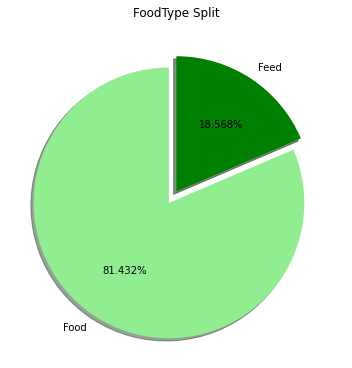

In [79]:
from collections import Counter

labels, values = zip(*Counter(worlddatadfn["Element"]).items())
colors = ['lightgreen', 'green']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[5, 5])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.3f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("FoodType Split")
plt.show()

In [80]:
#check for null values
worlddatadfn.isnull()

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
worlddatadfn.isna()

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
worlddatadfn.isna().any()

Area Code       False
Area            False
Item Code       False
Item            False
Element         False
Unit            False
Y2007            True
Y2008            True
Y2009            True
Y2010            True
Y2011            True
Y2012           False
Y2013           False
Country Code    False
POP2007         False
POP2008         False
POP2009         False
POP2010         False
POP2011         False
POP2012         False
POP2013         False
dtype: bool

In [83]:
worlddatadfn.isna().sum()

Area Code         0
Area              0
Item Code         0
Item              0
Element           0
Unit              0
Y2007           104
Y2008           104
Y2009           104
Y2010           104
Y2011           104
Y2012             0
Y2013             0
Country Code      0
POP2007           0
POP2008           0
POP2009           0
POP2010           0
POP2011           0
POP2012           0
POP2013           0
dtype: int64

In [84]:
worlddatadfn.isna().any().sum()
#gives output in a single value if any null is present or not

5

In [85]:
#De-Duplication Process
#remove all duplicate values. There is no need for duplicate values in data analysis
worlddatadfn.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18048    False
18049    False
18050    False
18051    False
18052    False
Length: 18053, dtype: bool

In [68]:
#based on results above dataset doesnt contain duplicates

In [87]:
#select data with respect to food 
foodplot = worlddatadfn[worlddatadfn['Element'] == 'Food']
foodplot

,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
0,2,Afghanistan,2511,Wheat and products,Food,1000 tonnes,4164.0,4252.0,4538.0,4605.0,...,4810,4895,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
1,2,Afghanistan,2805,Rice (Milled Equivalent),Food,1000 tonnes,455.0,490.0,415.0,442.0,...,425,422,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
3,2,Afghanistan,2513,Barley and products,Food,1000 tonnes,48.0,62.0,55.0,60.0,...,78,89,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
5,2,Afghanistan,2514,Maize and products,Food,1000 tonnes,67.0,69.0,71.0,82.0,...,77,76,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
6,2,Afghanistan,2517,Millet and products,Food,1000 tonnes,19.0,21.0,18.0,14.0,...,14,12,AFG,27100542.0,27722281.0,28394806.0,29185511.0,30117411.0,31161378.0,32269592.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18046,181,Zimbabwe,2949,Eggs,Food,1000 tonnes,21.0,22.0,27.0,27.0,...,24,25,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18048,181,Zimbabwe,2948,Milk - Excluding Butter,Food,1000 tonnes,356.0,341.0,385.0,418.0,...,426,451,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18050,181,Zimbabwe,2960,"Fish, Seafood",Food,1000 tonnes,14.0,15.0,18.0,29.0,...,40,40,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0
18051,181,Zimbabwe,2961,"Aquatic Products, Other",Food,1000 tonnes,0.0,0.0,0.0,0.0,...,0,0,ZWE,12255920.0,12379553.0,12526964.0,12697728.0,12894323.0,13115149.0,13350378.0


In [35]:
# select Elment = Food and Area is india, china and USA
#foodarea =fooddatadfn[(fooddatadfn['Area'] == 'India')
#               | (fooddatadfn['Area']== 'China,Mainland') | (fooddatadfn['Area'] == 'United States of America')]
#foodarea

In [90]:
foodsorted = worlddatadfn[((worlddatadfn['Item']== 'Meat')| (worlddatadfn['Item']== 'Beans')|(worlddatadfn['Item']== 'Eggs')|

(worlddatadfn['Item']== 'Freshwater Fish')|
               (worlddatadfn['Item']== 'Poultry Meat')|(worlddatadfn['Item']== 'Rice (Milled Equivalent)')|(worlddatadfn

['Item']== 'Soyabeans')|(worlddatadfn['Item']=='Wheat and products'))
&
((worlddatadfn['Area'] == 'India')       
               | (worlddatadfn['Area']== 'China, mainland') | (worlddatadfn['Area'] == 'United States of America')
| (worlddatadfn['Area']== 'China') | (worlddatadfn['Area'] == 'United States')
)] 
foodsorted


,Area Code,Area,Item Code,Item,Element,Unit,Y2007,Y2008,Y2009,Y2010,...,Y2012,Y2013,Country Code,POP2007,POP2008,POP2009,POP2010,POP2011,POP2012,POP2013
7547,100,India,2511,Wheat and products,Feed,1000 tonnes,1334.0,1450.0,1617.0,1816.0,...,1898,1870,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7548,100,India,2511,Wheat and products,Food,1000 tonnes,69311.0,71361.0,69900.0,72719.0,...,70589,75833,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7549,100,India,2805,Rice (Milled Equivalent),Feed,1000 tonnes,1929.0,1975.0,1810.0,1920.0,...,2105,2124,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7550,100,India,2805,Rice (Milled Equivalent),Food,1000 tonnes,82527.0,84858.0,85325.0,86928.0,...,86933,87006,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7572,100,India,2546,Beans,Feed,1000 tonnes,221.0,181.0,173.0,269.0,...,225,226,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7573,100,India,2546,Beans,Food,1000 tonnes,3772.0,3109.0,2820.0,4516.0,...,3819,3806,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7579,100,India,2555,Soyabeans,Food,1000 tonnes,63.0,25.0,29.0,58.0,...,442,484,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7628,100,India,2734,Poultry Meat,Food,1000 tonnes,1790.0,1918.0,2119.0,2222.0,...,2304,2352,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7637,100,India,2744,Eggs,Food,1000 tonnes,2435.0,2530.0,2681.0,2831.0,...,3062,3231,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09
7640,100,India,2761,Freshwater Fish,Food,1000 tonnes,3699.0,4434.0,4371.0,5062.0,...,4354,4354,IND,1.183209e+09,1.200670e+09,1.217726e+09,1.234281e+09,1.250288e+09,1.265780e+09,1.280842e+09


<AxesSubplot:xlabel='Area', ylabel='Item'>

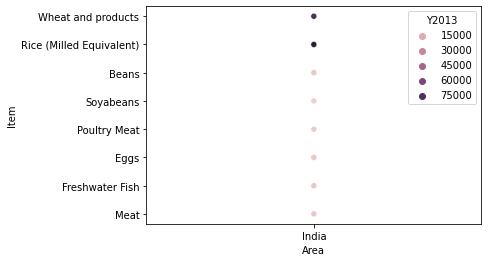

In [91]:
sns.scatterplot(x="Area", y="Item", hue='Y2013', data=foodsorted)
#plot_data= foodsorted.plot(kind='hist')

<AxesSubplot:xlabel='POP2013', ylabel='Item'>

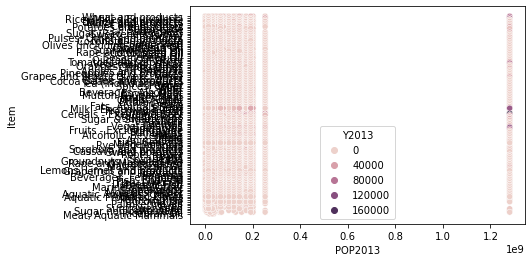

In [95]:
sns.scatterplot(x="POP2013",y="Item",hue='Y2013',data=worlddatadfn)

<AxesSubplot:xlabel='Area Code', ylabel='Item Code'>

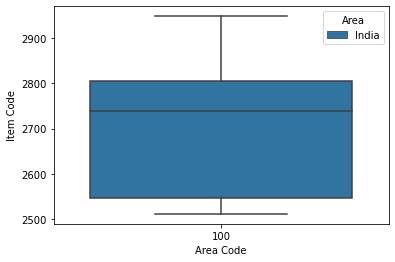

In [92]:
sns.boxplot(x="Area Code", y="Item Code",hue="Area", data=foodsorted)

In [65]:
#export new data
#df2 = fooddata.to_csv("ArvindFAO.csv", encoding = 'utf-8')